#**Keras CNN**

케라스의 합성곱 신경망은 Conv2D 클래스이다.   
최대풀링은 MaxPooling2D 클래스를 사용하고,   
특성 맵을 일렬로 펼칠 때에는 Flatten 클래스를 사용한다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split


(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)

y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)
x_train.shape
x_train = x_train / 255
x_val = x_val / 255

4431872/4422102 [==============================] - 0s 0us/step


##**합성곱층 쌓기**

Conv2D 클래스의 첫 번째 파라미터는 합성곱 커널의 개수이다.   
두 번째 파라미터는 합성곱 커널의 크기로 높이와 너비를 튜플로 넘긴다.   
activation 파라미터에 relu 활성화 함수를 지정한다.   
패딩은 세임 패딩을 사용한다.   

<br>

Sequential 클래스에 층을 처음 추가할 때에는 배치 차원을 제외한 입력의 크기를 지정한다.(input_shape)   

In [ ]:
conv1 = tf.keras.Sequential()
conv1.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))

##**풀링층 쌓기**

MaxPooling2D 클래스의 첫 번째 파라미터는 풀링의 높이와 너비를 튜플로 넣어준다.   
스트라이드 값은 strides 파라미터로 지정 가능하고, 기본값은 풀링의 크기이다.   
패딩은 padding 파라미터로 지정하고, 기본값은 valid이다.   

In [ ]:
conv1.add(MaxPooling2D((2,2)))

##**특성 맵 펼치기**

완전연결층에 연결하기 위해 배치 차원을 제외하고 일렬로 펼친다.

In [ ]:
conv1.add(Flatten())

##**완전 연결층 쌓기**

첫 번째 완전연결층에는 100개의 뉴런, 렐루함수를 사용하고,   
마지막 출력층에는 10개의 뉴런과 소프트맥스 함수를 사용한다.   

In [ ]:
conv1.add(Dense(100, activation='relu'))
conv1.add(Dense(10, activation='softmax'))

In [ ]:
conv1.summary() # 모델 구조 확인하기

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 10)        100       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 10)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1960)              0         
                                                                 
 dense (Dense)               (None, 100)               196100    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
__________________________________________________

In [ ]:
conv1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # 아담 옵티마이저와 크로스엔트로피 손실함수를 사용해 컴파일

In [ ]:
history = conv1.fit(x_train, y_train_encoded, epochs=20, validation_data=(x_val, y_val_encoded))

Epoch 1/20
1500/1500 [==============================] - 26s 17ms/step - loss: 0.4657 - accuracy: 0.8391 - val_loss: 0.3332 - val_accuracy: 0.8849
Epoch 2/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.3215 - accuracy: 0.8847 - val_loss: 0.3134 - val_accuracy: 0.8901
Epoch 3/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.2746 - accuracy: 0.8996 - val_loss: 0.2857 - val_accuracy: 0.8957
Epoch 4/20
1500/1500 [==============================] - 26s 17ms/step - loss: 0.2413 - accuracy: 0.9113 - val_loss: 0.2655 - val_accuracy: 0.9068
Epoch 5/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.2165 - accuracy: 0.9216 - val_loss: 0.2525 - val_accuracy: 0.9113
Epoch 6/20
1500/1500 [==============================] - 26s 17ms/step - loss: 0.1925 - accuracy: 0.9290 - val_loss: 0.2605 - val_accuracy: 0.9096
Epoch 7/20
1500/1500 [==============================] - 26s 17ms/step - loss: 0.1735 - accuracy: 0.9360 - val_loss: 0.2469 -

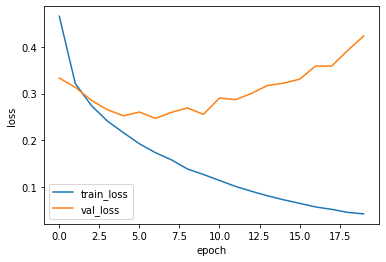

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

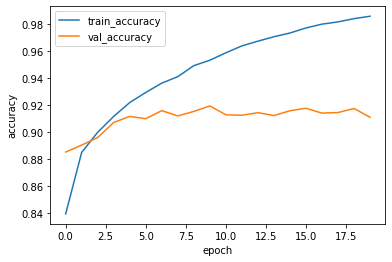

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

정확도와 손실 그래프를 보면 에포크가 진행될수록 검증 손실이 크게 증가하는 것을 알 수 있다.   
**'과대적합'**이 발생한 것이다.   
과대적합을 해결할 수 있는 솔루션을 배워보자.

#**Drop Out: 드롭 아웃**

신경망에서 과대적합을 줄이는 방법 중 하나이다.   
**'드롭아웃'**은 무작위로 뉴런을 비활성화시킨다.   

드롭아웃은 모델을 훈련시킬 때에만 적용하는 기법이기 때문에   
상대적으로 테스트와 실전에서의 출력값이 훈련할 때의 출력값보다 높아지게 된다.   
따라서 테스트나 실전에서는 출력값을 드롭아웃 비율만큼 낮춰야 한다.

<br>

실제 텐서플로를 비롯한 딥러닝 패키지에서는 반대로 훈련할 때 드롭아웃 비율만큼 뉴런의 출력을 높인다. (문제가 없기 때문)



###**드롭아웃을 적용해 합성곱 신경망을 구현하자**

텐서플로에서 드롭아웃을 적용하려면 간단히 Dropout 클래스를 추가하면 된다.   
Dropout 클래스의 파라미터에 드롭아웃 될 비율을 실수로 지정한다.   
ex> 30%의 드롭아웃 비율 → 0.30   

드롭아웃 층에는 학습되는 가중치가 없고, 단순히 일부 뉴런의 출력을 무작위로 0으로 만들고   
나머지 뉴런의 출력을 드롭되지 않은 비율로 나누어 증가시킨다.

In [2]:
from tensorflow.keras.layers import Dropout

conv2 = tf.keras.Sequential()
conv2.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
conv2.add(MaxPooling2D((2, 2)))
conv2.add(Flatten())
conv2.add(Dropout(0.5))
conv2.add(Dense(100, activation='relu'))
conv2.add(Dense(10, activation='softmax'))

In [3]:
conv2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 10)        100       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 10)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1960)              0         
                                                                 
 dropout (Dropout)           (None, 1960)              0         
                                                                 
 dense (Dense)               (None, 100)               196100    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                        

In [5]:
conv2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = conv2.fit(x_train, y_train_encoded, epochs=20, validation_data=(x_val, y_val_encoded))

Epoch 1/20
1500/1500 [==============================] - 23s 15ms/step - loss: 0.4863 - accuracy: 0.8243 - val_loss: 0.3630 - val_accuracy: 0.8663
Epoch 2/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.3660 - accuracy: 0.8669 - val_loss: 0.2935 - val_accuracy: 0.8949
Epoch 3/20
1500/1500 [==============================] - 23s 15ms/step - loss: 0.3263 - accuracy: 0.8786 - val_loss: 0.2735 - val_accuracy: 0.9033
Epoch 4/20
1500/1500 [==============================] - 23s 15ms/step - loss: 0.3045 - accuracy: 0.8857 - val_loss: 0.2613 - val_accuracy: 0.9048
Epoch 5/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.2834 - accuracy: 0.8945 - val_loss: 0.2551 - val_accuracy: 0.9074
Epoch 6/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.2675 - accuracy: 0.8997 - val_loss: 0.2573 - val_accuracy: 0.9081
Epoch 7/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.2546 - accuracy: 0.9041 - val_loss: 0.2398 -

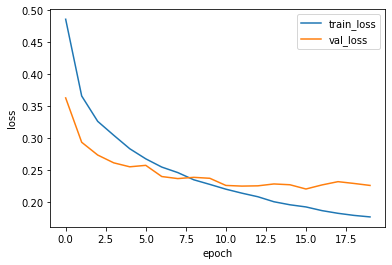

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

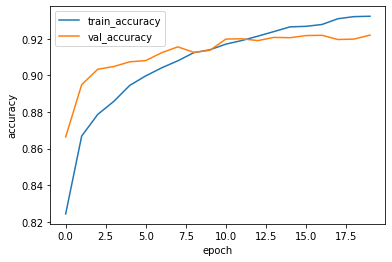

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()